## Day 10

https://adventofcode.com/2022/day/10

In [9]:
def parse10(filename):
    with open(filename) as f:
        data = [ l.strip("\n").split(" ") for l in f.readlines() ]
        return data

In [88]:
import numpy as np
import matplotlib.pyplot as plt

def solve10(instr,verbose=False):
    screen = np.zeros((6,40))
    sprite = np.array([0,1,2])
    col = 0
    X = 1
    C = 0
    S = 20
    ss = []
    i = 0
    while i<len(instr):
        cmd = instr[i]
        if cmd[0]=="noop":
            cyc = 1
            val = 0
        elif cmd[0]=="addx":
            cyc = 2
            val = int(cmd[1])
        for c in range(cyc):
            # move cursor vertical position
            row = C//40
            # 1. start cycle
            C += 1
            if col in sprite: screen[row][col] = 1
            # 2. during cycle
            if C==S: # check signal strenght during the cycle
                if verbose: print(S,C,X,C*X)
                ss.append(C*X)
                S+=40
            if c==cyc-1: # increment register at the end of cycle
                X += val
            # 3. end cycle
            sprite = [X-1,X,X+1]
            # move cursor horizontal position
            col = (col+1)%40
        i+=1
    return sum(ss),screen

In [91]:
instr0 = parse10("data/test10_2.txt")
instr = parse10("data/input10.txt")

sol0,screen0=solve10(instr0)
sol ,screen =solve10(instr)

print("Test 1:",sol0)
print("Part 1:",sol)

Test 1: 13140
Part 1: 13920


(-0.5, 39.5, 5.5, -0.5)

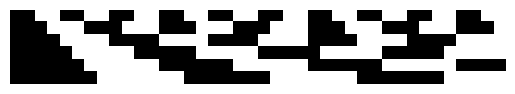

In [95]:
plt.imshow(screen0,cmap="binary")
plt.axis('off')

(-0.5, 39.5, 5.5, -0.5)

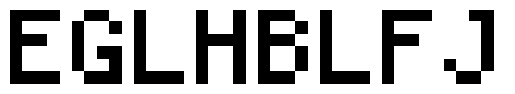

In [94]:
plt.imshow(screen,cmap="binary")
plt.axis('off')